In [2]:
## Reading and understanding the data

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import pandas as pd

In [29]:
bike_share=pd.read_csv('/Users/shekher.r/upgrade/python/Juune-ML53/ML/multiple regression/BikeSharing_assignment/day.csv')

In [25]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
bike_share.shape

In [26]:
bike_share.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [12]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(730, 16)

In [30]:
## convert 'weathersit' and 'season'  in string categorical values

def season_map(x):
    return x.map({1:'spring',2:'summer',3:'fall',4:'winter'})

#bike_share['season']=bike_share['season'].astype('str')
bike_share[['season']]=bike_share[['season']].apply(season_map)


In [32]:
bike_share['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [35]:
## convert 'weathersit' and 'season'  in string categorical values
def weathersit_map(x):
    return x.map({1:'clear',2:'mistCloud',3:'lightRain',4:'heavyRain'})
bike_share['weathersit']=bike_share[['weathersit']].apply(weathersit_map)

In [36]:
bike_share['weathersit'].value_counts()

clear        463
mistCloud    246
lightRain     21
Name: weathersit, dtype: int64

In [37]:
## removing repeated and unwanted column
#instant = we can remove index
#dteday=already cap
#casual & registered
bike_share_new=bike_share[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed','cnt']]

In [45]:
# Convert season,weathersit,mnth,weekday to 'category' data type

bike_share_new['season']=bike_share_new['season'].astype('category')
bike_share_new['weathersit']=bike_share_new['weathersit'].astype('category')
bike_share_new['mnth']=bike_share_new['mnth'].astype('category')
bike_share_new['weekday']=bike_share_new['weekday'].astype('category')
bike_share_new['holiday']=bike_share_new['holiday'].astype('category')
bike_share_new['workingday']=bike_share_new['workingday'].astype('category')

In [46]:
bike_share_new.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(6), float64(4), int64(2)
memory usage: 39.9 KB


In [48]:
bike_share_new.describe()

,yr,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [49]:
## visualising the data
import matplotlib.pyplot as plt
import seaborn as sns


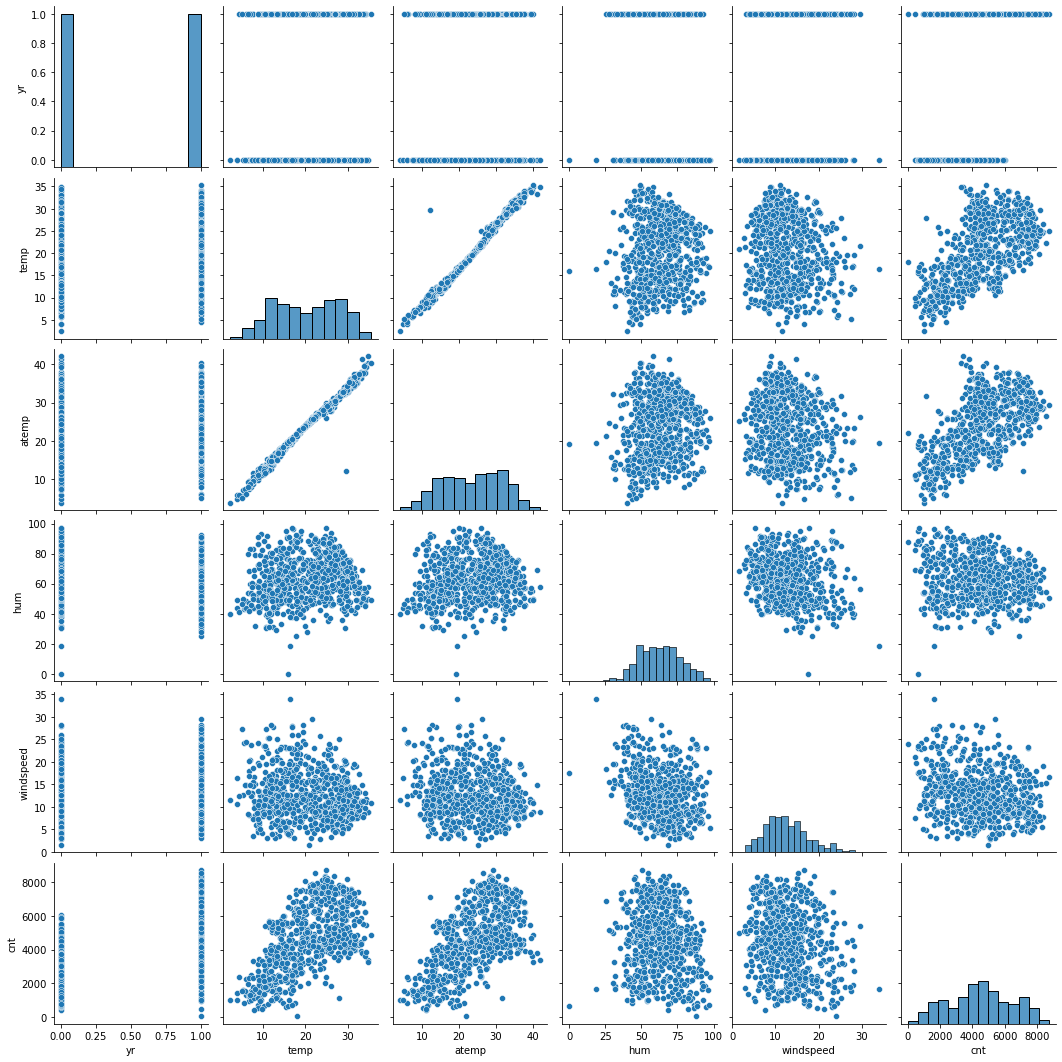

In [50]:
## visualising numeric values
sns.pairplot(bike_share_new)
plt.show()

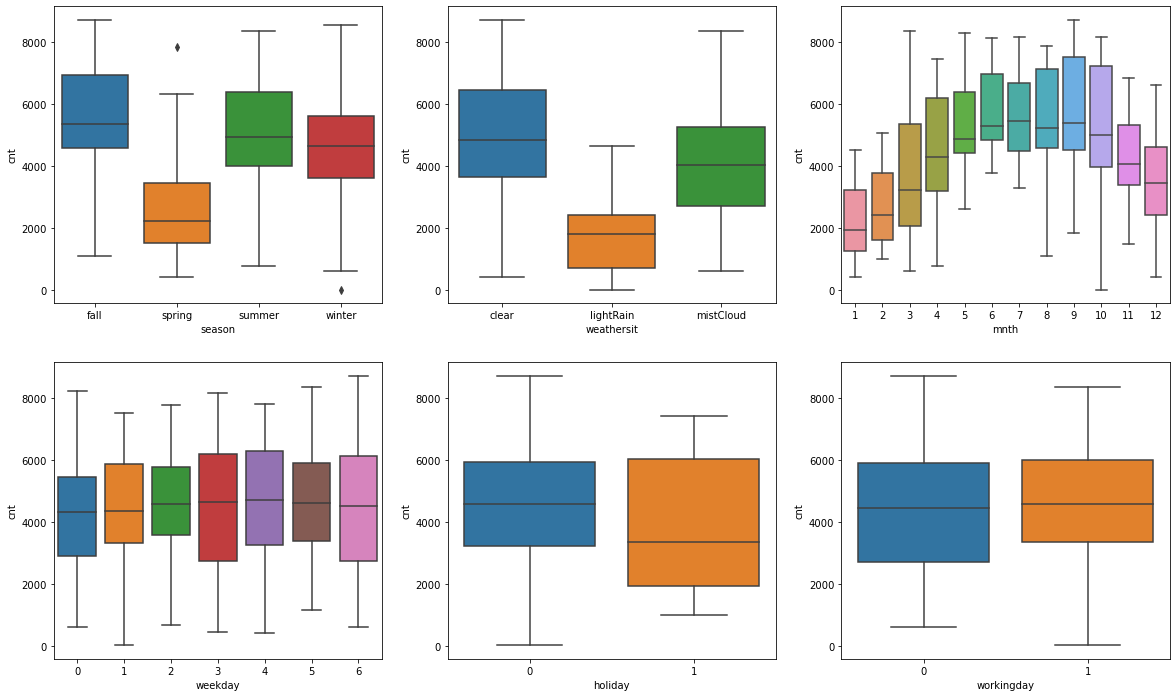

In [51]:
##visualising categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_share_new)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_share_new)
plt.show()

In [ ]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
